## Preparing Data For LSTM Model

In [1188]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [1189]:

data_train = pd.read_csv('./data/BTC_day_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Time'])

data_train.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,546032.0,13581.853333,79055.774840,13577.224578,-0.631845,-1.084205
1,1375295.0,11256.200000,312627.561330,11228.619219,-2325.653333,-3.104354
2,1483002.0,11082.995000,331822.898074,11109.805837,-173.205000,-2.371885
3,1057999.0,11119.696667,204609.312037,11132.567299,36.701667,-1.849318
4,716100.0,11520.748333,125430.954800,11519.809543,401.051667,-1.324697


In [1190]:
data_test = pd.read_csv('./data/BTC_day_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,5245264.0,36853.776250,254899.781852,36785.026600,-2334.466607,0.283444
1,4035430.0,35884.194286,174589.020944,35920.637885,-969.581964,-0.191312
2,3698231.0,35924.745714,162424.239185,35892.636068,40.551429,-0.293085
3,3329228.0,36767.647143,143617.525589,36759.579332,842.901429,-0.052462
4,3697336.0,35678.465000,161577.522564,35807.521852,-1089.182143,-0.758468


In [1191]:
window_size = 7

In [1192]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [1193]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [1194]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


In [1195]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [1196]:
X_train.shape, Y_train.shape

((1039, 7, 6), (1039,))

In [1197]:
print(X_train)
print(Y_train)

[[[0.06237578 0.40358449 0.06640929 0.40366794 0.61162052 0.41911124]
  [0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  ...
  [0.0896041  0.32338859 0.11017873 0.32357369 0.69291672 0.40989894]
  [0.08217742 0.37189374 0.10105998 0.37230599 0.86405121 0.44210239]
  [0.10050868 0.3240839  0.11931713 0.32439562 0.36306227 0.41614852]]

 [[0.19514287 0.31309523 0.28685708 0.31223779 0.14106245 0.34172724]
  [0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  ...
  [0.08217742 0.37189374 0.10105998 0.37230599 0.86405121 0.44210239]
  [0.10050868 0.3240839  0.11931713 0.32439562 0.36306227 0.41614852]
  [0.11105703 0.29579426 0.1455842  0.2956863  0.46459798 0.40030352]]

 [[0.21238704 0.30635597 0.30497386 0.30761243 0.57669366 0.36978524]
  [0.14434299 0.307784   0.18490819 0.30849853 0.6191764  0.38980275]
  [0

## Training LSTM Model

In [1198]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [1199]:
regressor = Sequential()

#R1
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.5))

#R2
regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.5))

#R3
regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.5))

#R4
regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [1200]:
regressor.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_136 (LSTM)             (None, 7, 50)             11400     
                                                                 
 dropout_136 (Dropout)       (None, 7, 50)             0         
                                                                 
 lstm_137 (LSTM)             (None, 7, 60)             26640     
                                                                 
 dropout_137 (Dropout)       (None, 7, 60)             0         
                                                                 
 lstm_138 (LSTM)             (None, 7, 80)             45120     
                                                                 
 dropout_138 (Dropout)       (None, 7, 80)             0         
                                                                 
 lstm_139 (LSTM)             (None, 120)             

In [1201]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [1202]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
33/33 [==============================] - 4s 13ms/step - loss: 0.0158
Epoch 2/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0106
Epoch 3/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0090: 0s - loss: 0
Epoch 4/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0085
Epoch 5/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0088: 0s - loss: 0.0
Epoch 6/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0077
Epoch 7/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 8/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0076
Epoch 9/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0084
Epoch 10/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0077


## Preparing Test Set For LSTM Prediction

In [1203]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [1204]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [1205]:
X_test.shape, Y_test.shape

((221, 7, 6), (221,))

## Predicting Outputs For Test Set

In [1206]:
Y_pred = regressor.predict(X_test)

In [1207]:
Y_test

array([0.26028743, 0.17764511, 0.15461145, 0.12940529, 0.15455031,
       0.20164309, 0.32159096, 0.27983836, 0.12312047, 0.09553376,
       0.1750047 , 0.17100857, 0.20766915, 0.17663325, 0.49100622,
       0.19177964, 0.38195887, 0.13275208, 0.13914955, 0.19852219,
       0.14323619, 0.19967627, 0.16405466, 0.32027055, 0.29459334,
       0.27479014, 0.23765009, 0.1961083 , 0.1595857 , 0.1591906 ,
       0.2153403 , 0.20191093, 0.20944443, 0.12539973, 0.19404735,
       0.23126308, 0.15025635, 0.4073595 , 0.54386938, 0.25384584,
       0.22060834, 0.28014042, 0.15435153, 0.4967749 , 0.1547704 ,
       0.18272776, 0.1985306 , 0.16616213, 0.09188197, 0.12310975,
       0.15658755, 0.1799782 , 0.22749121, 0.21815298, 0.2195083 ,
       0.24035813, 0.14393   , 0.29219303, 0.24012301, 0.20464341,
       0.17564721, 0.15376913, 0.12778453, 0.13901306, 0.18679234,
       0.17052761, 0.25824813, 0.23532554, 0.1621608 , 0.11077257,
       0.09998572, 0.16176516, 0.12422038, 0.40365531, 0.12022

In [1208]:
Y_pred

array([[0.1067876 ],
       [0.12784016],
       [0.14817859],
       [0.16207644],
       [0.14922833],
       [0.16738361],
       [0.18408132],
       [0.19547737],
       [0.1830025 ],
       [0.18277562],
       [0.18524739],
       [0.18845895],
       [0.18698737],
       [0.17784882],
       [0.15402612],
       [0.1413365 ],
       [0.15560383],
       [0.18273231],
       [0.19884983],
       [0.21653378],
       [0.23130497],
       [0.24858594],
       [0.20964116],
       [0.21700439],
       [0.20127648],
       [0.22222304],
       [0.23810405],
       [0.25060982],
       [0.27370957],
       [0.28759506],
       [0.30758053],
       [0.2915939 ],
       [0.27943373],
       [0.27458566],
       [0.27082175],
       [0.27152887],
       [0.28111994],
       [0.29226395],
       [0.30244935],
       [0.31694955],
       [0.32833993],
       [0.3486695 ],
       [0.3518585 ],
       [0.34183517],
       [0.3359484 ],
       [0.30658954],
       [0.27040878],
       [0.267

## Descaling Outputs

In [1209]:
scale_factor = 1/scaler.scale_[4]


In [1210]:
scale_factor

15254.227857142863

In [1211]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [1212]:
Y_pred.shape, Y_test.shape

((221, 1), (221,))

In [1213]:
Y_test

array([ 3970.48369989,  2709.83898463,  2358.47827122,  1973.97785061,
        2357.54568293,  3075.90958505,  4905.62175832,  4268.71814076,
        1878.10777449,  1457.2937205 ,  2669.56159052,  2608.60366035,
        3167.83257241,  2694.40386694,  7489.92081326,  2925.45027107,
        5826.48756894,  2025.03054695,  2122.61887792,  3028.30277638,
        2184.95745556,  3045.90733409,  2502.52721295,  4885.47993527,
        4493.79389585,  4191.71135604,  3625.1686594 ,  2991.48064794,
        2434.35657202,  2428.32965507,  3284.84999973,  3079.99525955,
        3194.91306073,  1912.87612471,  2960.04252361,  3527.73975414,
        2292.0446411 ,  6213.9545581 ,  8296.30750389,  3872.22223816,
        3365.20993431,  4273.32585631,  2354.51346849,  7577.91755183,
        2360.90300077,  2787.37093639,  3028.43094215,  2534.67493798,
        1401.5885027 ,  1877.94418079,  2388.62223392,  2745.42842934,
        3470.20270369,  3327.75531302,  3348.42959709,  3666.47763161,
      

In [1214]:
Y_pred

array([[1628.9624 ],
       [1950.1029 ],
       [2260.3499 ],
       [2472.3508 ],
       [2276.363  ],
       [2553.3076 ],
       [2808.0183 ],
       [2981.8562 ],
       [2791.5618 ],
       [2788.1008 ],
       [2825.806  ],
       [2874.7957 ],
       [2852.348  ],
       [2712.9463 ],
       [2349.5496 ],
       [2155.9792 ],
       [2373.6162 ],
       [2787.4402 ],
       [3033.3005 ],
       [3303.0557 ],
       [3528.3787 ],
       [3791.9866 ],
       [3197.9138 ],
       [3310.2344 ],
       [3070.3171 ],
       [3389.8408 ],
       [3632.0933 ],
       [3822.8591 ],
       [4175.228  ],
       [4387.0405 ],
       [4691.9033 ],
       [4448.04   ],
       [4262.546  ],
       [4188.5923 ],
       [4131.177  ],
       [4141.9634 ],
       [4288.2676 ],
       [4458.2607 ],
       [4613.6313 ],
       [4834.8203 ],
       [5008.5723 ],
       [5318.684  ],
       [5367.3296 ],
       [5214.4316 ],
       [5124.6333 ],
       [4676.7866 ],
       [4124.877  ],
       [4078.

In [1215]:
og_data_test = pd.read_csv('./data/BTC_day_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Time'])

close_price = og_data_test['Close'] 



In [1216]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [1217]:
pred_list

[array([38482.74], dtype=float32),
 array([37834.297], dtype=float32),
 array([38185.098], dtype=float32),
 array([39240.], dtype=float32),
 array([37954.83], dtype=float32),
 array([38108.492], dtype=float32),
 array([33459.117], dtype=float32),
 array([35863.504], dtype=float32),
 array([34792.09], dtype=float32),
 array([35030.273], dtype=float32),
 array([34822.945], dtype=float32),
 array([35435.37], dtype=float32),
 array([33369.125], dtype=float32),
 array([36125.81], dtype=float32),
 array([36681.28], dtype=float32),
 array([36368.273], dtype=float32),
 array([35832.668], dtype=float32),
 array([38296.465], dtype=float32),
 array([40759.08], dtype=float32),
 array([40354.98], dtype=float32),
 array([41884.418], dtype=float32),
 array([42732.402], dtype=float32),
 array([42056.613], dtype=float32),
 array([49940.543], dtype=float32),
 array([49623.703], dtype=float32),
 array([48268.83], dtype=float32),
 array([51734.664], dtype=float32),
 array([51288.6], dtype=float32),
 array

In [1218]:
price_list

[40824.25994989358,
 38594.033270341264,
 38283.223985506396,
 38741.62499346846,
 38036.01068293158,
 38631.09244218989,
 35556.71925832297,
 37150.36671219198,
 33878.63777449111,
 33699.46747050142,
 34666.70034051843,
 35169.17866034966,
 33684.60828669414,
 36107.26886694369,
 41821.65081326098,
 37137.74455678856,
 39285.53756893572,
 37534.05340409473,
 39848.39602077698,
 40080.22849067049,
 40540.9960269843,
 41986.32108408808,
 41361.22721295369,
 51515.78743527443,
 51047.18246727609,
 49070.699927465845,
 51727.73723082468,
 50457.222076508755,
 49653.96657201709,
 51086.54251221672,
 51178.82571401818,
 52347.623830980185,
 55423.793060727556,
 53536.49755327776,
 58962.00680932687,
 59439.57403984996,
 59786.741783954574,
 60323.975986674166,
 57266.99036103586,
 53652.47509530338,
 50319.66564859275,
 50606.42821173882,
 48308.35061135152,
 57200.963266111045,
 50717.71050077237,
 52980.18054827536,
 51358.54931887822,
 51448.12208083377,
 50390.06850269621,
 52761.85418

## Visualization & Evaluation

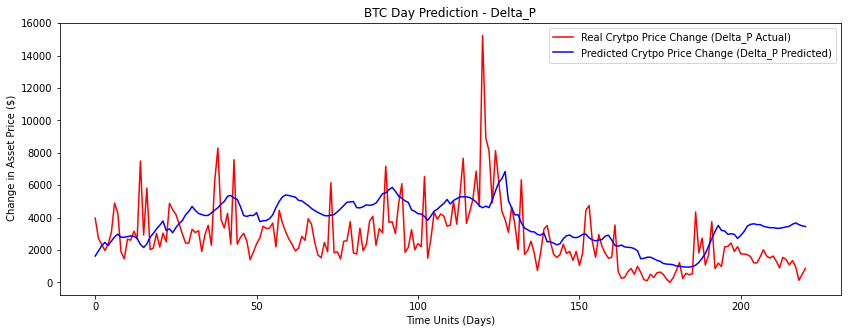

In [1219]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

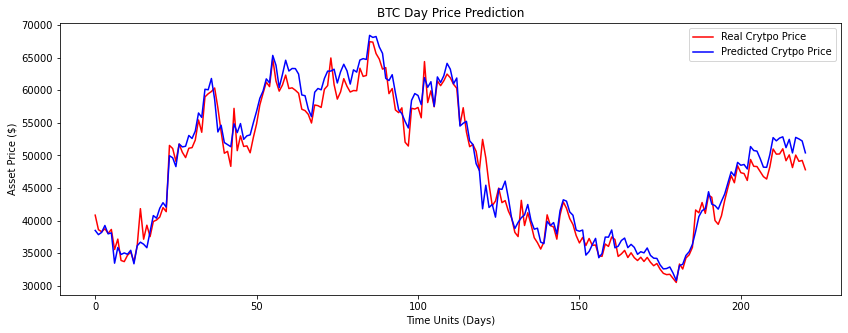

In [1220]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [1221]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 1900.2730067019318


In [1230]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum[0]/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

Mean Absolue Percentage Error (MAPE): 0.03212859296151416


In [1233]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 0.8
